In [1]:
!python --version

Python 3.12.3


In [15]:
!pip install tensorflow

In [217]:
"""For the Deep Learning using TensorFlow and Keras course;
   Author: Arta Khosravi
   Nov. 2025""";

---------

## Installing the required libraries

In [299]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import scipy as sp
import pandas as pd
sns.set_style("whitegrid")

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [8]:
tf.__version__,keras.__version__

('2.20.0', '3.11.3')

# For the Classification Cases:

## Importing the fashion mnist dataset

In [204]:
fmnist_data = keras.datasets.fashion_mnist
#shape of fmnist_data: (28,28,1)
#10 labels/outputs

In [206]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

## Initial checks

In [208]:
x_train.shape, x_test.shape, y_train.shape, x_test.shape #np.concatenate((x_train,x_test),axis=0) if you want to do 80/20

((60000, 28, 28), (10000, 28, 28), (60000,), (10000, 28, 28))

In [210]:
y_train[:10] #vector #the label of our outputs: Tshirt, Trousers, etc.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [212]:
x_train[8:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,  39,   1,   0],
        ...,
        [  0,   0,   0, ..., 238,   0,   0],
        [  0,   0,   0, ..., 131,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   7,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   9,   0],
        [  0,   0,   0, ...,   0,   3,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

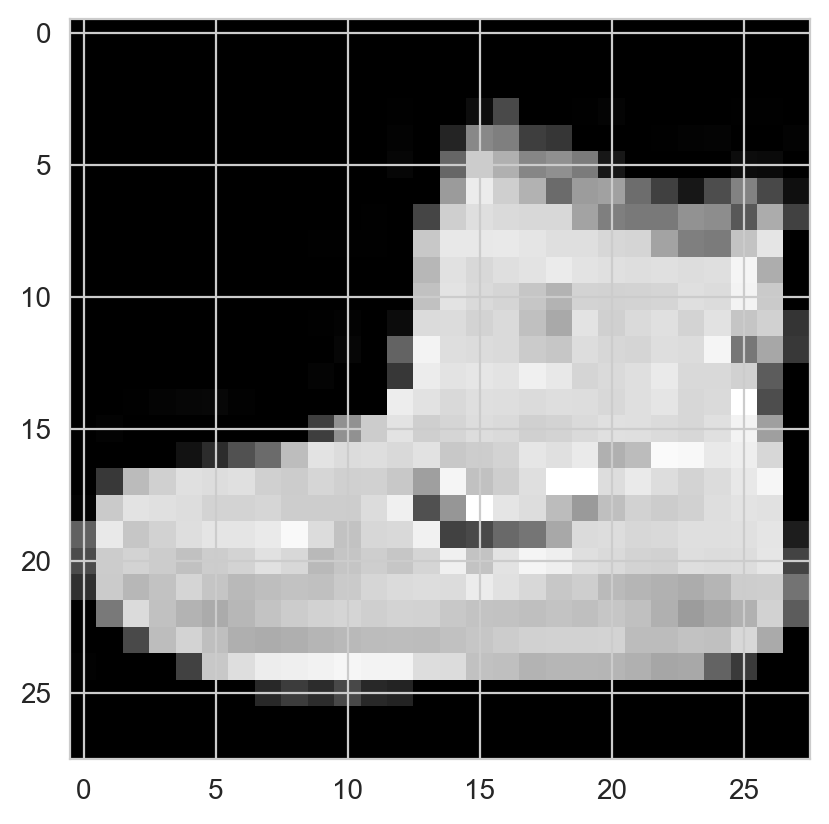

In [305]:
plt.imshow(x_train[0,], cmap="gray")

## Normalizing the Data

In [216]:
"""
Normalizing the data so that our model won't have the possibility of overfitting.
Important to note that the normalizer is made on the train data, as in it is fit on train and then checked on test.
"""
max_norm=[];min_norm=[]
for i in range(27):
    max_norm.append(max(x_train[0][i]))
    min_norm.append(min(x_train[0][i]))
print(max(max_norm),min(min_norm))
x_train, x_test = x_train/max(max_norm), x_test/max(max_norm)

255 0


## Defining the Model

#### First way to build the model:

In [219]:
model = keras.models.Sequential() #choosing a sequential model
#Dense models are expected to have the input layer to be a vector/1d array (x).
#If our input layer was recieving images, they wouldn't be 1d arrays, but 2d. So we should change that.
#Thus, we manually change and add the layer to "Flatten."
"""
The first layer is Flat:
    First arguement: input_shape: The shape of the input data, which in our required images are 28*28.
"""
"""
The hidden layers are dense: 
    First arguement: units, or the number of neurons: better chosen between 10-100. Here our number of choice is 100 neurons,
    Second arguement: activation: The activation function is ReLU/softmax/etc. (return to the "Theory" folder.),
    Further arguements, like Kernel Initializer will be important further on.
"""
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [220]:
model.summary() #28*28 = 784

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

#### Second way to build the model

In [223]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [225]:
model.summary() #28*28 = 784

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
model.layers

[<Flatten name=flatten_14, built=True>,
 <Dense name=dense_42, built=True>,
 <Dense name=dense_43, built=True>,
 <Dense name=dense_44, built=True>]

In [229]:
weights, bias = model.layers[1].get_weights()

In [ ]:
weights_2 , bias_2 = model.layers[2].get_weights()

In [194]:
weights.shape,weights_2.shape

((784, 100), (100, 75))

In [231]:
weights #The model is still not trained

array([[ 0.01776882,  0.08212283,  0.06810221, ...,  0.07047434,
        -0.05180695, -0.05540928],
       [ 0.0004359 ,  0.01788467,  0.06909068, ...,  0.00294138,
        -0.03499517, -0.0236983 ],
       [-0.07575718,  0.02304526,  0.04698437, ..., -0.08037647,
         0.00191984,  0.02084528],
       ...,
       [-0.07023154, -0.04002741, -0.0619471 , ..., -0.01745547,
         0.00451683,  0.05364278],
       [ 0.07235549,  0.02145643, -0.07707004, ...,  0.07293309,
         0.07201619,  0.02542356],
       [ 0.05141224, -0.00570136, -0.03521832, ..., -0.03342209,
         0.02060085, -0.07469558]], dtype=float32)

In [233]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Model training APIs:
1) Compile method: Configures the model for training.
2) Fit method: Trains the model for a fixed number of epochs (dataset iterations).
3) Evaluate method: Returns the loss value & metrics values for the model in test mode.
4) Predict method: Generates output predictions for the input samples.
5) train_on_batch method: Runs a single gradient update on a single batch of data.
6) test_on_batch method: Test the model on a single batch of samples.
7) predict_on_batch method: Returns predictions for a single batch of samples.

## Compiling the (Dense) Model

In [250]:
"""
When compiling the model, the required arguements are the model's loss, optimizer,-
-its metrics (if it is a classification problem, then its accuracy, R2score, etc. or-
-if it is a regression model, mean squared error, mean absolute error, and all the other relevant parameters will be of importance),-
-loss weights (specifying scalar coefficients), etc.
    First arguement: Loss function (such as binary/sparse-categorical cross-entropy)
    Second arguement: Optimizer: so far our theory is limited to the Stochastic Gradiant Descent (SGD), 
    although many other optimizers are more accurate. A relevant case can be "Adam," with its own arguements such as learning_rate.
    Third arguement: Metrics, including accuracy (such as binary accuracy), probabilistic, 
    regression, classification, image segmentation, hinge metrics and etc.
"""
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Fitting the model

In [257]:
"""
    First arguement: X: input, can include np arrays, dict, list of tensors, keras.utils.PyDataset, tf.data.Dataset, etc.
    Here our input data is the trained X.
    Second arguement: Y: output, can be np arrays or backend-native tensors. 
    "If x is a keras.utils.PyDataset, tf.data.Dataset, torch.utils.data.DataLoader or a Python generator function, 
    y should not be specified since targets will be obtained from x."
    Here our output is the trained Y.
    Third arguement: Epochs, initially chosen between 50-100: int, "Number of epochs to train the model. 
    An epoch is an iteration over the entire x and y data provided (unless the steps_per_epoch flag is set to something other than None)."
    Fourth arguement: Validation Split: Float between 0 and 1. 
    "Fraction of the training data to be used as validation data. 
    The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics 
    on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. 
    This argument is only supported when Y and Y are made of np arrays or tensors."
    Further arguements: batch_size: int or None: "Number of samples per gradient update. If unspecified, batch_size will default to 32."
    Note: 1594/1594 is overall (the number of overall trained data-validation data)/batch size.
"""
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7503 - loss: 0.7577 - val_accuracy: 0.8134 - val_loss: 0.5327
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8229 - loss: 0.5090 - val_accuracy: 0.8273 - val_loss: 0.4859
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8377 - loss: 0.4625 - val_accuracy: 0.8338 - val_loss: 0.4601
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8483 - loss: 0.4361 - val_accuracy: 0.8431 - val_loss: 0.4385
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8540 - loss: 0.4162 - val_accuracy: 0.8531 - val_loss: 0.4164
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.4003 - val_accuracy: 0.8566 - val_loss: 0.4005
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8637 - loss: 0.3875 - val_accuracy: 0.8587 - val_loss: 0.4164
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8674 - loss: 0.3759 

'\n    First arguement: X: input, can include np arrays, dict, list of tensors, keras.utils.PyDataset, tf.data.Dataset, etc.\n    Here our input data is the trained X.\n    Second arguement: Y: output, can be np arrays or backend-native tensors. \n    "If x is a keras.utils.PyDataset, tf.data.Dataset, torch.utils.data.DataLoader or a Python generator function, \n    y should not be specified since targets will be obtained from x."\n    Here our output is the trained Y.\n    Third arguement: Epochs, initially chosen between 50-100: int, "Number of epochs to train the model. \n    An epoch is an iteration over the entire x and y data provided (unless the steps_per_epoch flag is set to something other than None)."\n    Fourth arguement: Validation Split: Float between 0 and 1. \n    "Fraction of the training data to be used as validation data. \n    The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics \n    on 

In [335]:
print(history.history,"\nEpochs:",history.epoch)

{'accuracy': [0.7502940893173218, 0.8229411840438843, 0.8376666903495789, 0.8482941389083862, 0.8540195822715759, 0.8600588440895081, 0.863725483417511, 0.8673921823501587, 0.8718627691268921, 0.8741568922996521, 0.876960813999176, 0.8796274662017822, 0.8806078433990479, 0.8835882544517517, 0.8852941393852234, 0.8867254853248596, 0.8890784382820129, 0.8888038992881775, 0.8922941088676453, 0.8941372632980347, 0.8958039283752441, 0.8962548971176147, 0.8980196118354797, 0.8997451066970825, 0.9002549052238464, 0.9015686511993408, 0.9038039445877075, 0.9054313898086548, 0.9053921699523926, 0.9068431258201599, 0.907764732837677, 0.9093529582023621, 0.9104706048965454, 0.9122157096862793, 0.9127451181411743, 0.9135882258415222, 0.9154509902000427, 0.9164705872535706, 0.9176862835884094, 0.9187058806419373, 0.9191176295280457, 0.9207450747489929, 0.9211568832397461, 0.9210196137428284, 0.92290198802948, 0.9233725666999817, 0.9242548942565918, 0.9257646799087524, 0.9261960983276367, 0.926862716

In [313]:
hist_df = pd.DataFrame(history.history) 
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.750294,0.757670,0.813444,0.532669
1,0.822941,0.508992,0.827333,0.485925
2,0.837667,0.462508,0.833778,0.460056
3,0.848294,0.436124,0.843111,0.438479
4,0.854020,0.416191,0.853111,0.416361


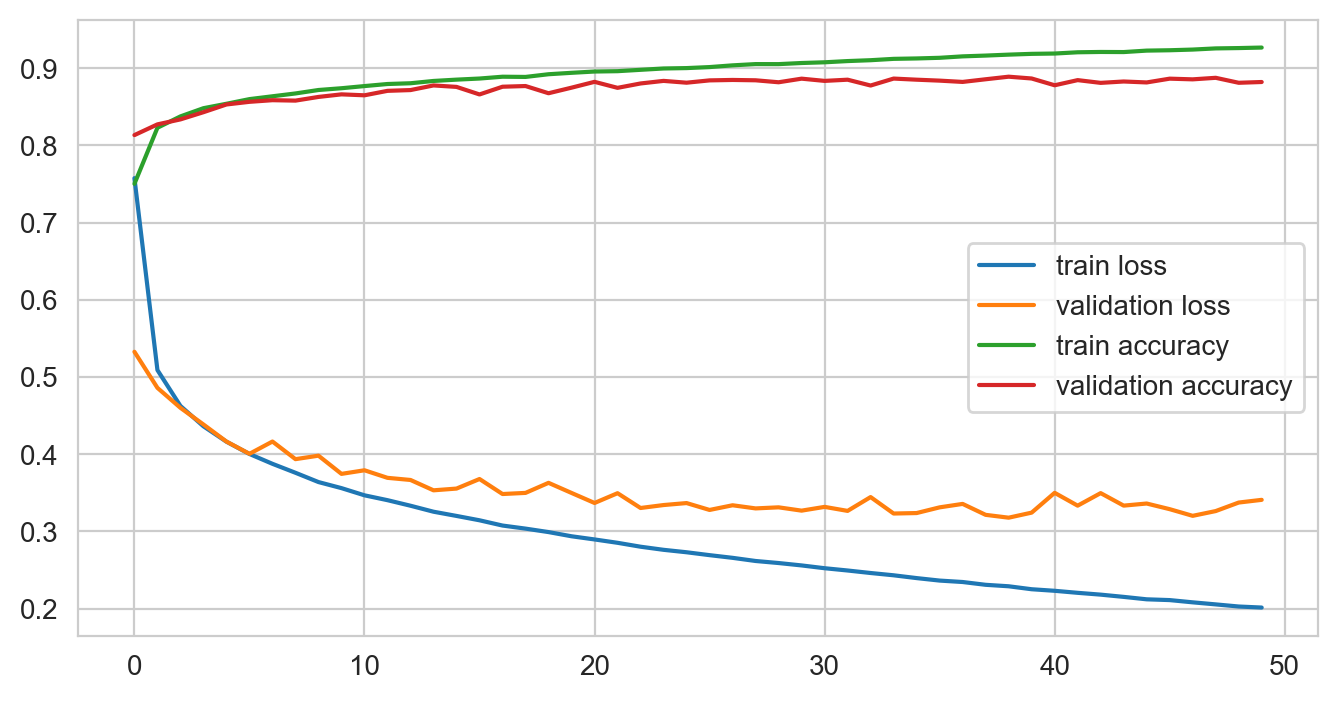

In [357]:
fig = plt.subplots(figsize=(8, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

## Evaluating the model

In [365]:
"""
To evaluate the model and its accuracy, its output being the loss and metrics value for tests.
    First arguement: X: the test input
    Second arguement: Y: the test output
    Third arguement: verbose: Shows the Verbosity, as in when evaluating the model, what will the outputs be (either 0 or 1).
"""
loss_eval, metrics_eval = model.evaluate(x_test, y_test, verbose=0)
print("Loss value: ",loss_eval,"\nMetrics value (accruacy): ",metrics_eval)

Loss value:  0.361884742975235 
Metrics value (accruacy):  0.8776000142097473


In [377]:
x_test_3 = x_test[1:3] #choosing 3 of the test inputs
x_test_3.shape #The model is working okay

(2, 28, 28)

## Predicting the model

In [395]:
print("Not round:",model.predict(x_test_3), #To test out the model and its outputs, we will need to test out its predictions
"\nRound up to 3 digits:",model.predict(x_test_3).round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Not round: [[4.09587165e-06 1.02553639e-10 9.99035358e-01 7.15479187e-09
  8.48287076e-04 5.88433816e-13 1.12323054e-04 1.00818876e-12
  2.91430347e-09 6.69399771e-14]
 [7.32776186e-08 9.99999762e-01 3.09237116e-08 1.24251599e-07
  9.57111723e-09 1.05714148e-15 3.45648454e-10 3.01257039e-13
  6.83909249e-11 1.44373854e-17]] 
Round up to 3 digits: [[0.    0.    0.999 0.    0.001 0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


In [399]:
model.predict(x_test_3).shape
#This includes 2 rows (because of the shape of x_test_3), and 10 columns (because of our model's output being 10 neurons.)
#Here, 10 possibilities have been predicted for us. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


(2, 10)

In [409]:
#Thus, if we sum it up:
pred_1, pred_2 = model.predict(x_test_3).round(3)
np.sum(pred_1),np.sum(pred_2)
#We will see that their sum is 1; perfectly reasonable since they are all a probability value.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


(1.0, 1.0)

In [421]:
#Now, to check which part of the array was predicted as the max (1):
list(pred_1).index(max(list(pred_1))), list(pred_2).index(max(list(pred_2)))
#Sol2: np.argmax(model.predict(x_test_3).round(3), axis=1)
#We see the index to be "2" and "1", separately. 
#That means in the labels of Fmnist, our predictions are pred_1 to be a Pullover, and pred_2 to be a Trouser.

(2, 1)

In [295]:
#Checking with the test outputs, our predictions were absolutely accurate! Hooray!
y_test[1:3]

array([2, 1], dtype=uint8)